In [1]:
#Import all functions 

from pygazeanalyser_functions import *

# Examples


### Read Data

In [2]:
"""
Reads Data from the asc file. Make sure the asc file is inside the folder 'Participant Data'

Change phase to switch between fixation, stimulus and reward phases

Example code below



"""


#participant details
partic_id = 'G036'
game_nr  = 4 #game number
phase = 'fixation'


data = read_data(partic_id, game_nr,phase)
# print(data) # Uncomment this line to print

#### Draw Heatmaps

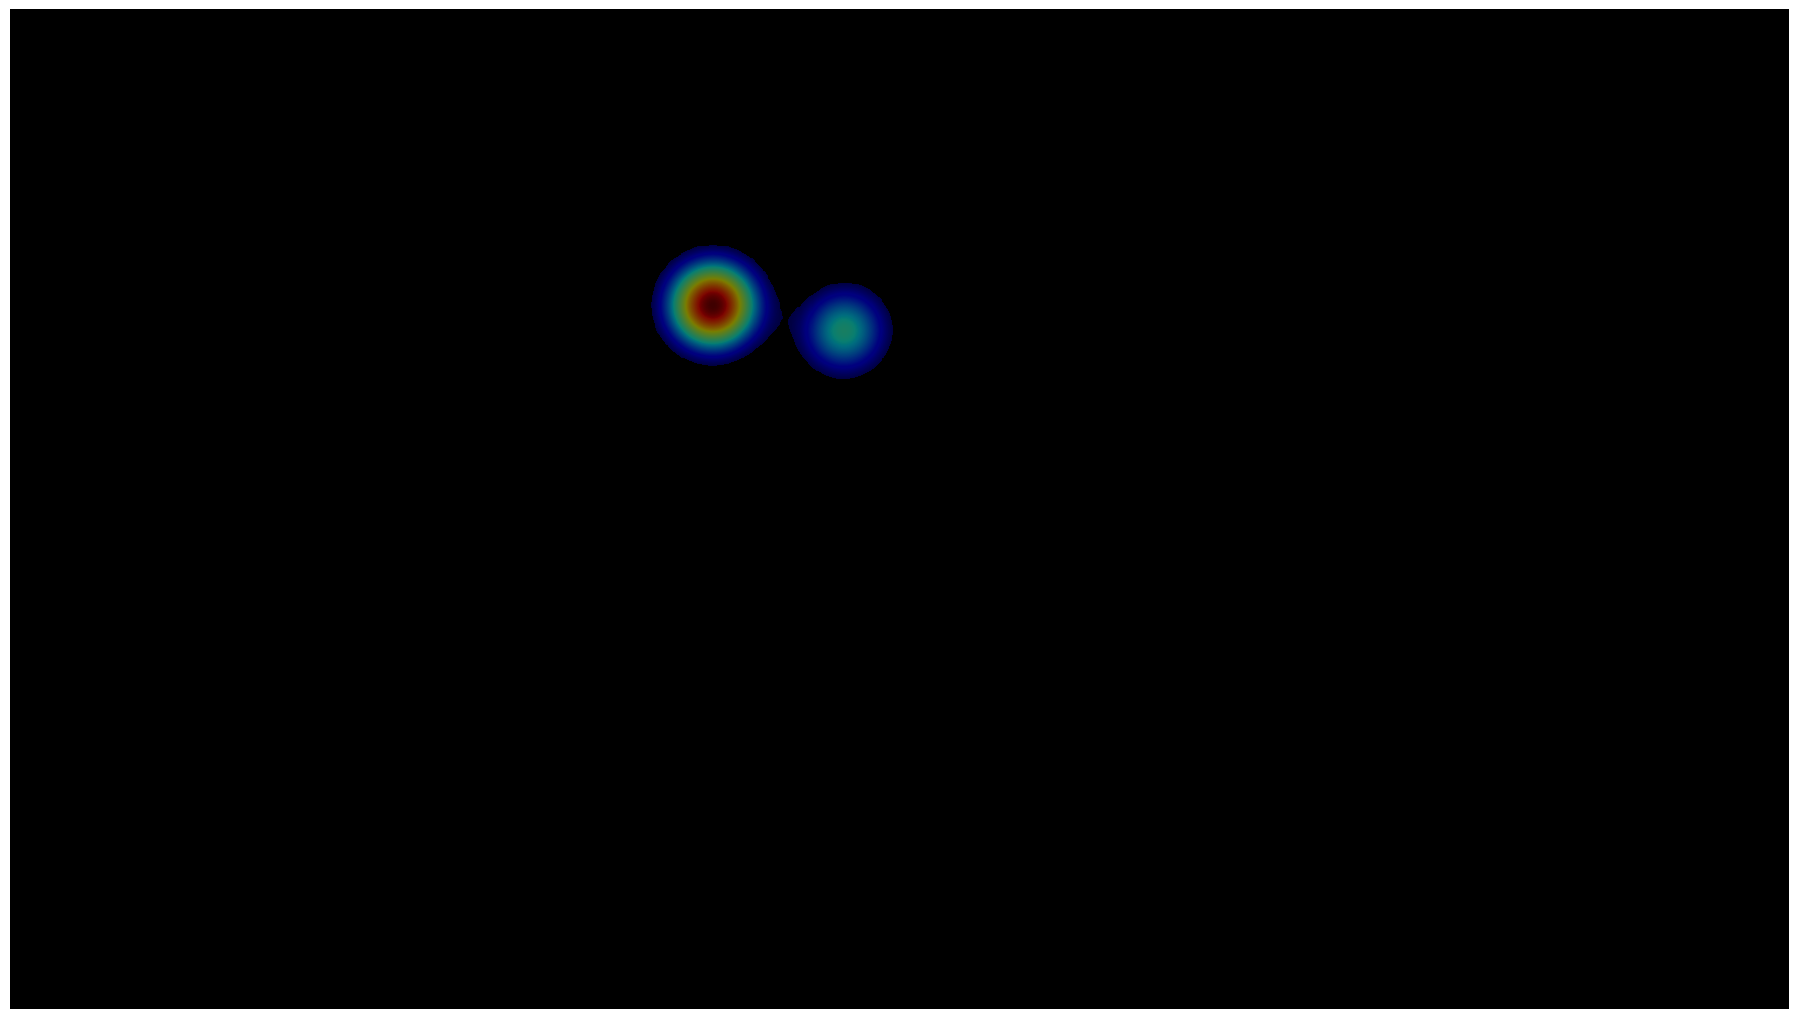

In [3]:
"""
Draws heatmaps, saccading path and saves it in the output_images folder

Required Inputs: data (loaded from the above cell)
                 trial_nr : trial number
                 partic_id, game_nr as per the previous cells

"""
trial_nr =3
draw_heatmap_trial(data,partic_id,game_nr,trial_nr)

### Get Centers and Radii

In [4]:
image_name = 'output_images\G036_game_4_3_20210506-172454_heatmap.png' # name of the image you want to load

centers,radii,image_out =return_centroid_heatmap(image_name)

findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.


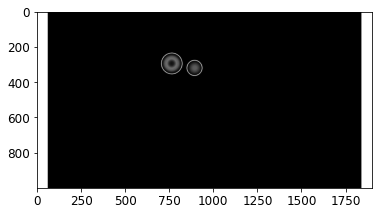

In [5]:
### See the output image to spot the circles
## The while outline is the radii

plt.imshow(image_out,cmap='gray')

In [6]:
radii

[43, 59]

### Velocity vs Noise

In [9]:

#participant details
partic_id = 'G031' #participant id
subject_id = 30   # id in number
phase = 'stimulus' 
dataset_fname = 'dataset_0423.csv' 
data_properties =  load_dataset_properties(dataset_fname)


In [4]:
from pygazeanalyser_functions import *

#parameters
folder_path = './Participant Data/asc_files/'
subject_id_arr = np.arange(2,37,1)

dataset_fname = 'dataset_0423.csv' 
data_properties =  load_dataset_properties(dataset_fname)


game_arr = np.arange(1,17,1)
trial_arr =np.arange(0,16,1)
csv_fname = 'speed_noise.csv'
#functions : speed of gaze

with open(csv_fname,'w') as fp:
    fp.write('Subject id \t Noise Mean \t speed mean')
    fp.write('\n')
    for subject_id in subject_id_arr:
        for game in game_arr:
            try:
                partic_id = return_partic_id(subject_id)
                fp.write(str(subject_id)+'\t')
                data_load = read_data(partic_id,game,phase='stimulus',path=folder_path)
                perc_noise_sample_mean = return_property_value_mean(data_properties,\
                                                             subject_id,game,'perc_noise_sample')
                fp.write(str(perc_noise_sample_mean)+'\t')
                #vel_x_mean, vel_y_mean = velocity_mean(data_load)
                vel_x,vel_y = np.array([],dtype='float32'),np.array([],dtype='float32')
                for trial in trial_arr:
                    vel_x_trial,vel_y_trial = velocity_gaze(data_load,trial)
                    vel_x = np.append(vel_x,vel_x_trial)
                    vel_y = np.append(vel_y,vel_y_trial)
                vel_x_mean, vel_y_mean = vel_x.mean(),vel_y.mean()
                speed_mean = vel_x_mean **2 + vel_y_mean **2
                fp.write(str(speed_mean)+' \t')
                fp.write('\n')
            except KeyError as e:
                print('error',e, 'for subject:', subject_id, )
                continue

<ipython-input-4-a1752983e6e8>:34: RuntimeWarning: Mean of empty slice.
  vel_x_mean, vel_y_mean = vel_x.mean(),vel_y.mean()
C:\Users\adith\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [2]:
dataset_fname = 'dataset_0423.csv' 
data_properties =  load_dataset_properties(dataset_fname)
return_property_value_mean(data_properties,30,2,'perc_noise')

11.625

In [4]:
g = np.arange(1,10,1)
g.mean()

5.0

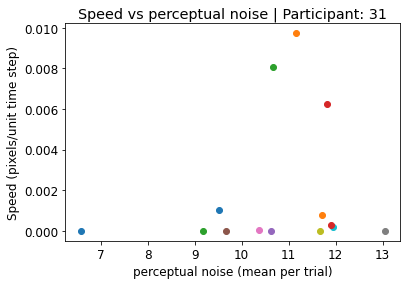

In [11]:
plot_speed_noise(partic_id)


### Inattention vs Noise

In [13]:
from pygazeanalyser_functions import *

#parameters
folder_path = './Participant Data/asc_files/'
subject_id_arr = np.arange(2,37,1)

dataset_fname = 'dataset_0423.csv' 
data_properties =  load_dataset_properties(dataset_fname)


game_arr = np.arange(1,17,1)
trial_arr =np.arange(0,16,1)
csv_fname = 'inattention_noise.csv'
dispsize = (1919,1079)

In [ ]:
x_cross,y_cross, center_x,center_y = [],[],[],[]

with open(csv_fname,'w') as fp:
    fp.write('Subject id \t Noise Mean \t Inattention mean')
    fp.write('\n')
        
    for subject_id in subject_id_arr:
        partic_id = return_partic_id(subject_id)
        print('participant:', partic_id, '...')
        for game_nr in game_arr:
            x_cross_game,y_cross_game, center_x_game,center_y_game = [],[],[],[]
        
            fp.write(str(subject_id)+'\t')
            data_load = read_data(partic_id,game,phase='stimulus',path=folder_path)
            perc_noise_sample_mean = return_property_value_mean(data_properties,\
                                                         subject_id,game,'perc_noise_sample')
            fp.write(str(perc_noise_sample_mean)+'\t')

            #initialize
            x_cross_trial,y_cross_trial, center_x_trial,center_y_trial = [],[],[],[]
            trial_success = []
            radius_list   = []

            
            for trial_nr in (trial_arr):
                
                try:
                    #get crosshair position
                    x_cross,y_cross = return_cross_pos(partic_id,game_nr,trial_nr)
                    if x_cross!=0:
                        ###get centroid

                        #fixations
                        fixations = np.array(data_load[trial_nr]['events']['Efix'])
                        fig_heatmap = draw_heatmap(fixations, dispsize)
                        #save heatmap
                        img_name_heatmap = 'img_1.png'
                        fig_heatmap.savefig(img_name_heatmap)

                        #feed heatmap to the function
                        #image_load = cv2.imread(img_name_heatmap,0)
                        center,radius,image_out = return_centroid_heatmap(img_name_heatmap)
                        #print(center)
                        if center.size!=0:
                            #print(center)
                            #print(center)

                            #print(center)

                            if center.shape[0]>1:
                                #print(center.shape)
                                #print(center)
                                center = center.mean(axis=0) #CHANGE LATER!!!
                                radius = radius.mean(axis=0)

                        #print(center)

                            x_cross_trial.append(x_cross)
                            y_cross_trial.append(y_cross)
                            center_x_trial.append(center[0][0])
                            center_y_trial.append(center[0][1])
                            trial_success.append(trial_nr)
                        #radius_list.append(radius)
                
                except:
                    print(e, 'trial,game',trial_nr,game_nr)

            x_cross_game=(np.mean(x_cross_trial))
            y_cross_game=(np.mean(y_cross_trial))
            center_x_game=(np.mean(center_x_trial))
            center_y_game=(np.mean(center_y_trial))    
        #x_cross.append(np.mean(x_cross_game))
        #y_cross.append(np.mean(y_cross_game))
        #center_x.append(np.mean(center_x_game))
        #center_y.append(np.mean(center_y_game))    
            dist = np.sqrt((x_cross_game - center_x_game)**2 +\
                       (center_y_game- y_cross_game )**2)
            fp.write(str(dist)+'\n')
        
        #fp.write('\n')

participant: G002 ...


In [7]:
np.mean([np.array([]),[3]])

array([], dtype=float64)

In [13]:
def save_plot_inattention_noise():
    pass

prop_label = 'perc_noise_sample'
perc_noise_game_list = []
for game_nr in games:
    perc_noise_trial_list = []
    for trial_nr in trials:
        perc_noise = return_property_value(data_properties, subject_id, game_nr, trial_nr,\
                                           prop_label)
        perc_noise_trial_list.append(perc_noise)
    perc_noise_game_list.append(np.mean(perc_noise_trial_list))

C:\Users\localadmin\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


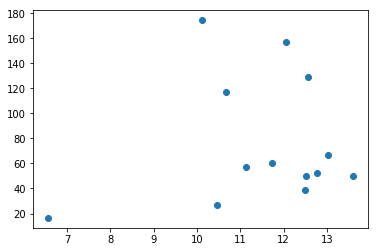

In [14]:
dist = np.sqrt((np.array(center_x_game) - np.array(x_cross_game))**2 +
               (np.array(center_y_game) - np.array(y_cross_game))**2)
plt.plot(perc_noise_game_list,dist,'o')

#### Calculate Saccadic dist vs noise

In [1]:
def plot_speed_noise(partic_id, dataset_fname = 'dataset_0423.csv',mode='mean',fig=None,ax=None):
    
    subject_id = int(partic_id[-2:]) # retrieve subject_id from the participant_id
    
    # Initialize the noise_sample_list
    perc_noise_game_list =[]
    trials = np.arange(1,17,1)
    games  = np.arange(1,17,1)
    prop_label = 'perc_noise_sample'
    data_properties =  load_dataset_properties(dataset_fname)

    #load the list
    for game_nr in games:
        perc_noise_trial_list = []
        for trial_nr in trials:
            perc_noise = return_property_value(data_properties, subject_id, game_nr, trial_nr,\
                                               prop_label)
            perc_noise_trial_list.append(perc_noise)
        perc_noise_game_list.append(perc_noise_trial_list)
        
        
    #load dist values
    dist_game_list =[]
    phase = 'stimulus'
    trials = np.arange(0,16,1)
    games  = np.arange(1,17,1)
    game_success = []
    for game_nr in games:
        counter_success = 0 # counter to track if velocity values are returned empty
        dist_trial_list = []
        data = read_data(partic_id, game_nr,phase)
        for trial_nr in trials:
            dist_x,dist_y = dist_gaze(data,trial_nr)
            
            # mean velocity
            if dist_x.size!=0:
                counter_success +=1
                dist_mean_x = np.mean(dist_x)
                dist_mean_y = np.mean(dist_y)
                #append to trial list
                dist_trial_list.append([dist_mean_x,dist_mean_y])
                dist_game_list.append(np.array(dist_trial_list))
                
        if counter_success!=0:
            game_success.append(game_nr)
            #print(game_nr)
    dist_game_list = np.array(dist_game_list)    
    ## Plots
    
    # define figure and axes
    if fig is None:
        fig = plt.figure()
        ax  = fig.add_subplot()
    
    #speed vs noise (speed = v_x**2 + v_y**2)
    for i,game_nr in enumerate(game_success):

        #calculate speed
        if mode == 'mean':
            dist_x_game_mean, dist_y_game_mean = (dist_game_list[i].mean(0))[0],\
                                            (dist_game_list[i].mean(0))[1]
        if mode == 'std':    
            dist_x_game_mean, dist_y_game_mean = (dist_game_list[i].std(0))[0],\
                                            (dist_game_list[i].std(0))[1]

        speed = dist_x_game_mean**2 + dist_y_game_mean**2
        
        # calculate average noise
        perc_noise_mean = np.array(perc_noise_game_list[i]).mean()
        if speed.size!=0:
            ax.scatter(perc_noise_mean,speed)


    #labels and titles
    ax.set_xlabel('perceptual noise (mean per trial)')
    ax.set_ylabel('Speed (pixels/unit time step)')
    ax.set_title('Speed vs perceptual noise | Participant: ' + str(subject_id))
    fig_title = 'speed_vs_perc_noise_participant_' + str(partic_id) 
    #plt.savefig(fig_title)
    
    return fig,ax